Import libraries and load datasets

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the datasets
urle = 'https://raw.githubusercontent.com/aryan-shetty/Datasets/main/energy_dataset.csv'
urlw = 'https://raw.githubusercontent.com/aryan-shetty/Datasets/main/weather_features.csv'
energy_df = pd.read_csv(urle)
weather_df = pd.read_csv(urlw)

# Perform mean imputation for numerical columns in energy dataset
energy_df.fillna(energy_df.mean(numeric_only=True), inplace=True)

# Perform mean imputation for numerical columns in weather dataset
weather_df.fillna(weather_df.mean(numeric_only=True), inplace=True)

# Perform forward-fill imputation for remaining missing values in weather dataset
weather_df.fillna(method='ffill', inplace=True)

# Drop columns with a high number of missing values
energy_df.drop(columns=['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'], inplace=True)

In [ ]:
# Data Exploration
print(energy_df.head())
print(weather_df.head())

In [ ]:
# Check for missing values
print(energy_df.isnull().sum())
print(weather_df.isnull().sum())

In [26]:
# Convert datetime columns to appropriate formats
energy_df['time'] = pd.to_datetime(energy_df['time'], utc=True)
weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'], utc=True)

selected_features = [
    'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil coal-derived gas',
    'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation fossil oil shale',
    'generation fossil peat', 'generation geothermal', 'generation hydro pumped storage consumption',
    'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation marine',
    'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste',
    'generation wind offshore', 'generation wind onshore', 'forecast solar day ahead', 'forecast wind onshore day ahead', 'price day ahead', 'price actual'
]

X = energy_df[selected_features]
y = energy_df['total load actual']  # Use 'total load actual' as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Implementation: Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)  # Fit the model before extracting feature importance

# Model Evaluation
y_pred_rf = model_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)

Random Forest Regressor:
Mean Absolute Error: 755.8025418281416
Mean Squared Error: 1024356.1586825522
Root Mean Squared Error: 1012.1048160554085
R-squared: 0.9508520748497601


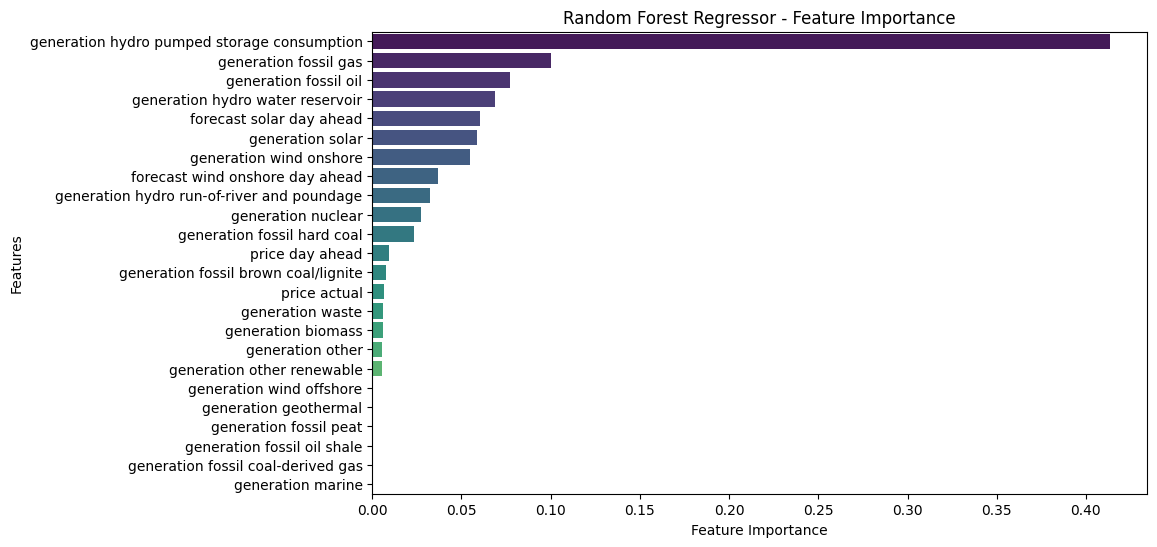

In [21]:
# Feature Importance
feature_importance = pd.Series(model_rf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, orient='h', palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Regressor - Feature Importance')
plt.show()

In [30]:
selected_features = [
    'generation biomass', 'generation fossil brown coal/lignite',
    'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil',
    'generation hydro pumped storage consumption',
    'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
    'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste',
    'generation wind onshore', 'forecast solar day ahead', 'forecast wind onshore day ahead', 'price day ahead', 'price actual'
]

# Prepare the data for model training
X = energy_df[selected_features]
y = energy_df['total load actual']  # Use 'total load actual' as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Implementation: Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Model Implementation: Gradient Boosting Regressor
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

# Model Evaluation on the Test Set
y_pred_rf = model_rf.predict(X_test)
y_pred_gb = model_gb.predict(X_test)

# Evaluate Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"Root Mean Squared Error: {rmse_rf}")
print(f"R-squared: {r2_rf}")

# Evaluate Gradient Boosting Regressor
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor:")
print(f"Mean Absolute Error: {mae_gb}")
print(f"Mean Squared Error: {mse_gb}")
print(f"Root Mean Squared Error: {rmse_gb}")
print(f"R-squared: {r2_gb}")

Random Forest Regressor:
Mean Absolute Error: 755.8181179834605
Mean Squared Error: 1026352.3188034703
Root Mean Squared Error: 1013.0904790804573
R-squared: 0.9507563004187879

Gradient Boosting Regressor:
Mean Absolute Error: 1018.9182554303818
Mean Squared Error: 1732284.3053129502
Root Mean Squared Error: 1316.1627199221798
R-squared: 0.9168861546300905
